<img src="zero-to-mastery-ml-master/images/sklearn-workflow-title.png"/>

![](sklearn-workflow-title.png)

<img src = "zero-to-mastery-ml-master/images/sklearn-6-step-ml-framework-tools-scikit-learn-highlight.png"/>

# What are we going to Cover
- An end to end scikit learn workflow
- Getting data ready (to be used with machine learning models)
- Choosing a machine learning model
- Fitting a model to the data (learning patterns)
- Making prediction with a model (using patterns)
- Evaluating model predictions
- Improving model predictions
- Saving and loading models

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
import numpy as np

# 0. An end to end Scikit Learn workflow

In [3]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("zero-to-mastery-ml-master/data/heart-disease.csv")
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (feature matrix)

X= heart_disease.drop("target", axis=1)

# Create Y (labels)

y = heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the data

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2);

In [7]:
clf.fit(X_train, y_train)   ## Random classifier 

RandomForestClassifier()

In [8]:
# Make a prediction

y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [9]:
y_test

296    0
34     1
12     1
227    0
204    0
      ..
121    1
256    0
146    1
237    0
24     1
Name: target, Length: 61, dtype: int64

In [10]:
#4. Evaluate the model

clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.7704918032786885

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.76      0.81      0.79        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[21,  8],
       [ 6, 26]], dtype=int64)

In [14]:
#5. Improve a model

# TRY different amount of n_estimators

np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 70.49%

Trying model with 20 estimators...
Model accuracy on test set: 77.05%

Trying model with 30 estimators...
Model accuracy on test set: 75.41%

Trying model with 40 estimators...
Model accuracy on test set: 77.05%

Trying model with 50 estimators...
Model accuracy on test set: 78.69%

Trying model with 60 estimators...
Model accuracy on test set: 77.05%

Trying model with 70 estimators...
Model accuracy on test set: 75.41%

Trying model with 80 estimators...
Model accuracy on test set: 78.69%

Trying model with 90 estimators...
Model accuracy on test set: 75.41%



In [15]:
# 6. Save a model and load it

import pickle 

pickle.dump(clf, open("random_forest_model_1.pk1","wb"))

In [16]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(X_test, y_test)

0.7540983606557377

# Revisit the above steps one by one

# Reminder 
## what_were_covering

0. An end to end scikit learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the mode/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together


# 1. Getting our data ready to be used with machine learning
## Three main things we have to do
1. split the data into features and labels (usually 'X' and 'y')
2. Filling (also called imputing) or disregarding missing values
3. Converting non numerical values to numberical values ( also called feature encoding) 

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
x = heart_disease.drop("target", axis =1) # x is data of independent variable
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heart_disease["target"] # y is the lables to be predicted ie dependent variable
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
# Split the data into training and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Clean the Data --> Transform Data ---> Reduce Data

## 1.1 Make sure its all numerical

In [22]:
car_sales = pd.read_csv("zero-to-mastery-ml-master/data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [23]:
len(car_sales)

1000

In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [25]:
# Split into X/y

X = car_sales.drop("Price", axis =1)
y = car_sales["Price"]

# split into training and test / validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [26]:
# Build  machine learning model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.fit(X_test, y_test)


# we are receiving error because of the car model name, so next code we gonna convert it

ValueError: could not convert string to float: 'Toyota'

In [27]:
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one hot", one_hot, categorical_features)], remainder = "passthrough")


transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [28]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


<img src = "zero-to-mastery-ml-master/images/onehotencoding.png"/>

In [29]:
X_train.head()

,Make,Colour,Odometer (KM),Doors
303,Toyota,White,134862,4
910,Nissan,White,40598,4
405,BMW,Blue,142189,3
432,Toyota,White,149989,4
43,Toyota,Blue,141617,4


In [30]:
# Using dummies categorizing into 1, 0 through 


dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [31]:
# let's refit the model

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size =0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
model.score(X_test, y_test)

0.3235867221569877

# 1.2 What if there were missing vales? 

1. Fill them with some values (also known as imputation).
2. Remove the samples with missing data altogether. 

In [33]:
# Import car sales missing data

car_sales_missing = pd.read_csv("zero-to-mastery-ml-master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [34]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [35]:
X = car_sales_missing.drop("Price", axis =1)
y = car_sales_missing["Price"]

In [36]:
# Let's try and convert our data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder ="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

## Option 1 : Fill missing data with pandas

In [37]:
# fill the "Make" Column

car_sales_missing["Make"].fillna("missing", inplace = True)

#Fill the "Colour" column

car_sales_missing["Colour"].fillna("missing", inplace = True)

#Fill the "Odometer (KM)" column

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

# Full the "Doors" column

car_sales_missing["Doors"].fillna(4, inplace=True)

In [38]:
# Check our dataframe again

car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [39]:
# Remove rows with missing price value

car_sales_missing.dropna(inplace = True) # removes all the rows with na values

In [40]:
car_sales_missing.isna().sum() # no values as there are no na  

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [41]:
len(car_sales_missing)

950

In [42]:
X = car_sales_missing.drop("Price", axis =1)
y = car_sales_missing["Price"]

In [43]:
# Let convert our data to numbes
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

# Option 2 ; Fill missing values with scikit learn



In [44]:
car_sales_missing = pd.read_csv("zero-to-mastery-ml-master/data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [45]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
car_sales_missing.dropna(subset=["Price"], inplace = True) # remove the data under which price value is na 

car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [47]:
# Split the data into X and y

X = car_sales_missing.drop("Price", axis =1)
y = car_sales_missing["Price"]

In [48]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [49]:
# Fill missing values with Scikit learn


from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with "missing" and numerical values with mean

cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing") 

door_imputer = SimpleImputer(strategy = "constant", fill_value=4)

num_imputer = SimpleImputer(strategy = "mean" )

# Define Columns

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = [ "Odometer (KM)"]


# create an imputer (something that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])


# Tranform the data

filled_X = imputer.fit_transform(X)
filled_X



array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [50]:
car_sales_filled = pd.DataFrame(filled_X, columns = ["Make","Colour","Doors","Odometer (KM)"])

car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [51]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [52]:
# converting data into numerical values

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [53]:
# Now we've got our data as number and filled (no missing data

# lets fit a modle


from sklearn.ensemble import RandomForestRegressor


# Reminder 
## what_were_covering

0. An end to end scikit learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the mode/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 2. Choosing the right estimator/algorithm for your problem 
        
Some things to note: 
* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - prediciting a category (heart disease or not)
* sometimes you'll see 'clf' (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)


If you are working on a machine learning problem and looking to use sklearn and not sure what model you should use, refer to the sklearn machine learning map:

<img src = "zero-to-mastery-ml-master/images/sklearn-ml-map.png"/>

# 2.1 Picking a machine learning model for a regression problem
## let's use the california housing dataset
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

https://scikit-learn.org/stable/datasets/real_world.html?highlight=california

In [54]:
# Get calofornia housing data

#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [55]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"] )
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [56]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [57]:
housing_df = housing_df.drop("MedHouseVal", axis =1)
housing_df.head()

KeyError: "['MedHouseVal'] not found in axis"

In [58]:
# import algorithm --- Ridge

from sklearn.linear_model import Ridge

#setup random seed

np.random.seed(42)

#create the data train and validation/test

x = housing_df.drop("target", axis =1)

y = housing_df["target"] # median house price in $100000s

# split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate and fit the mode ( on the training set)

model = Ridge()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)

model.score(x_test, y_test)

0.5758549611440128

In [ ]:
# import algorithm --- LinearRegression

from sklearn.linear_model import LinearRegression

#setup random seed

np.random.seed(42)

#create the data train and validation/test

x = housing_df.drop("target", axis =1)

y = housing_df["target"] # median house price in $100000s

# split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate and fit the mode ( on the training set)

model1 = LinearRegression()
model1.fit(x_train, y_train)

# Check the score of the model (on the test set)

model1.score(x_test, y_test)

In [59]:
# import algorithm ---- Lasso

from sklearn.linear_model import Lasso

#setup random seed

np.random.seed(42)

#create the data train and validation/test

x = housing_df.drop("target", axis =1)

y = housing_df["target"] # median house price in $100000s

# split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate and fit the mode ( on the training set)

model2 = Lasso()
model2.fit(x_train, y_train)

# Check the score of the model (on the test set)

model2.score(x_test, y_test)

0.2841671821008396

In [60]:
# import algorithm ---- ElasticNet

from sklearn.linear_model import ElasticNet

#setup random seed

np.random.seed(42)

#create the data train and validation/test

x = housing_df.drop("target", axis =1)

y = housing_df["target"] # median house price in $100000s

# split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate and fit the mode ( on the training set)

model3 = ElasticNet()
model3.fit(x_train, y_train)

# Check the score of the model (on the test set)

model3.score(x_test, y_test)

0.41655189098028234

In [61]:
# import algorithm ---- RandomForestregressor

from sklearn.ensemble import RandomForestRegressor

#setup random seed

np.random.seed(42)

#create the data train and validation/test

x = housing_df.drop("target", axis =1)

y = housing_df["target"] # median house price in $100000s

# split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate and fit the mode ( on the training set)

model4 = RandomForestRegressor(10)
model4.fit(x_train, y_train)

# Check the score of the model (on the test set)

model4.score(x_test, y_test)

0.7869919586520553

## 2.2 Picking a machine learning language for classification datasets

In [62]:
heart_disease = pd.read_csv("zero-to-mastery-ml-master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
len(heart_disease)

303

consulting the map and says to try "linearsvc"

In [64]:
# import the logarithm - Support Vector classifier

from sklearn.svm import LinearSVC

# setup random seed

np.random.seed(42)

x = heart_disease.drop("target", axis =1)
y = heart_disease["target"]


# split data in to training and test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

#instantiate linearsvc

clf = LinearSVC(max_iter = 100000)
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

C:\Users\Superman\Desktop\PythonMIData\MIData\sample_project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8852459016393442

In [65]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [66]:
# Using Randomforest classifier


# import model 

from sklearn.ensemble import RandomForestClassifier

#setup random seed

np.random.seed(42)

x = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# split the data into training and test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

#instantiate randomforest classififer

clf1 = RandomForestClassifier(n_estimators=100)
clf1.fit(x_train, y_train)

clf1.score(x_test, y_test)

0.8524590163934426

# Reminder 
## what_were_covering

0. An end to end scikit learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the mode/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together


# 3. Fit the model/alorithm on our data and use it to make predictions


## 3.1 Fitting the model to the data

* 'x' = features, features variables, data

* 'y' = lables, targets, target variables

In [67]:
# Using Randomforest classifier


# import model 

from sklearn.ensemble import RandomForestClassifier

#setup random seed

np.random.seed(42)

x = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# split the data into training and test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

#instantiate randomforest classififer

clf1 = RandomForestClassifier()

#Fit the model to the data - training

clf1.fit(x_train, y_train)

# Evalute the random forest classifier - use the patterns to the model 

clf1.score(x_test, y_test)

0.8524590163934426

In [68]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [69]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to do it

1. predict()
2. predict_proba()

## 1. Predict() method

In [70]:
clf1.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [72]:
# compare predictions to truth lables to evaluate the models

y_preds = clf1.predict(x_test)

np.mean(y_preds == y_test)

0.8524590163934426

In [73]:
clf.score(x_test, y_test)

0.8852459016393442

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

## 2. Pedictions with predict_proba()

In [75]:
# predict_proba() returns probabilites of a classification label

clf1.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [76]:
# Lets predict() on the same data

clf1.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

# *** Regression ***

In [77]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [78]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data

x = housing_df.drop("target", axis =1)
y = housing_df["target"]

# split into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2)

# creat model instance

model = RandomForestRegressor()

# Fit the model to the data

model.fit(x_train, y_train)

#Make predictions

y_preds = model.predict(x_test)

model.score(x_test, y_test)


0.8065734772187598

In [79]:

# Make predictions 
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [80]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [81]:
## Regression evaliation metrics

# Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error (y_test, y_preds)

0.32659871732073664

In [82]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# Reminder 
## what_were_covering

0. An end to end scikit learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the mode/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together


# 4. Evaluating a machine learning model

Three ways to evaluate scikit-Learn models/estimators :
1. Estimator's built-in 'score()' method
2. The 'scoring' parameter 
3. Problem-specific metric functions

Read more about these three here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the "Score" method

In [83]:
from sklearn.ensemble import RandomForestClassifier 

#setup random seed

np.random.seed(42)

x = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# split the data into training and test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

#instantiate randomforest classififer

clf1 = RandomForestClassifier(n_estimators =1000)

#Fit the model to the data - training

clf1.fit(x_train, y_train)



RandomForestClassifier(n_estimators=1000)

In [84]:
# The highest value for the .score() method is 1.0 the lowest is 0.0
clf1.score(x_test, y_test)

0.8688524590163934

In [85]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data

x = housing_df.drop("target", axis =1)
y = housing_df["target"]

# split into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2)

# creat model instance

model = RandomForestRegressor(n_estimators =100)

# Fit the model to the data

model.fit(x_train, y_train)

RandomForestRegressor()

In [86]:
## The default score() evaluation metric is r_squared  for regressoon algorithms

# Highest  =1.0, lowest = 0.0

model.score(x_test, y_test)

0.8065734772187598

## 4.2 Evaluating a model using the scoring parameter

In [87]:
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestClassifier 

#setup random seed

np.random.seed(42)

x = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# split the data into training and test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

#instantiate randomforest classififer

clf1 = RandomForestClassifier(n_estimators =100)

#Fit the model to the data - training

clf1.fit(x_train, y_train)


RandomForestClassifier()

In [88]:
clf1.score(x_test, y_test)

0.8524590163934426

<img src = "zero-to-mastery-ml-master/images/sklearn-cross-validation.png"/>

In [89]:
cross_val_score(clf1, x, y, cv=5) # gives 5 different socres

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [90]:
np.random.seed(42) #https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do

# single training and test split socre
clf_single_score = clf1.score(x_test, y_test)

# take the mean of 5 fold cross validation score

clf_cross_val_score = np.mean(cross_val_score(clf1, x, y, cv =5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [91]:
# Default scoring parameter of classifier = mean accuracy

clf.score(x_train, y_train)

0.8471074380165289

In [92]:
# scoring parameter set to None by default

cross_val_score(clf1, x, y, cv=5,scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion  matrix
4. Classification report

In [93]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 1. Accuracy

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis =1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators = 100)
cross_val_score = cross_val_score(clf, X, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [95]:
np.mean(cross_val_score)

0.8248087431693989

In [96]:
print(f"Heart Disease Classififer Accuracy: {np.mean(cross_val_score)*100:0.2f}%")

Heart Disease Classififer Accuracy: 82.48%


# 2. Area under ROC (receiver operating characteritic) curve (AUC/ROC)
 * Area Under curve (AUC)
 * ROC curve
## ROC curves are a comparison of a model's true positive rate (tpr) versus a models false psotove rate (fpr)

* True Positive = model predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1

In [97]:
# Create X_test etc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [98]:
from sklearn.metrics import roc_curve

#fit the classifier
clf.fit(X_train, y_train)

# make prediction with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs) # [:10] shows first 10 values out of 61 data values

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [99]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [100]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

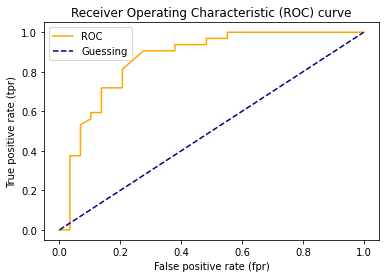

In [101]:
# Create a function for plotting ROC curves 

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label ="ROC")
    
    #Plot line with no predictive power (baseline)
    
    plt.plot([0,1],[0,1], color ="darkblue", linestyle="--", label = "Guessing")
    
    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [102]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

#### * Explanation of  ROC  and AUC score 

### perfecct ROC curve

For more information on these metrics, bookmark the following resources and refer to them when you need:

ROC and AUC, Clearly Explained! by StatQuest - https://www.youtube.com/watch?v=4jRBRDbJemM

ROC documentation in Scikit-Learn (contains code examples) - https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

How the ROC curve and AUC are calculated by Google's Machine Learning team - https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

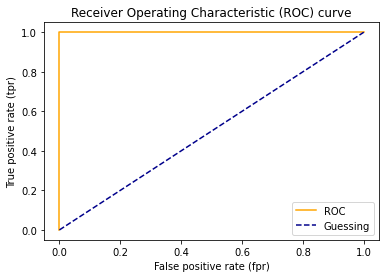

In [103]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

#### AUC score

In [104]:
roc_auc_score(y_test, y_test)

1.0

# 3. Confusion Matrix

* A confusion matrix is a quick way to compare the lables a model predicts and the acutal lables it was supposed to predict. 
In essence giving you an idea of where the model is getting confused. 

In [105]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)


array([[23,  6],
       [ 6, 26]], dtype=int64)

In [106]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
           rownames = ["Actial Label"],
           colnames = ["Predicted Lables"])

Predicted Lables,0,1
Actial Label,,
0,23,6
1,6,26


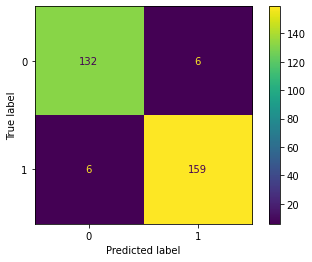

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator= clf, X=X, y=y);

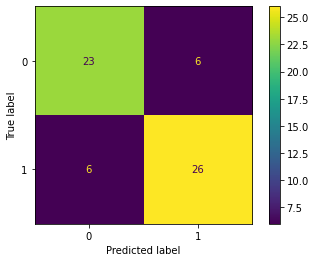

In [108]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds)

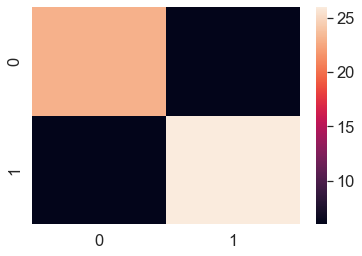

In [109]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

#set the font sclase

sns.set(font_scale = 1.5)

# create a confusion matric

conf_mat = confusion_matrix(y_test, y_preds)

# plot it using Seaborn
sns.heatmap(conf_mat);



## 4. Clasification Report

* Precision : indicates the porportion of positive identifications (model predicted class 1) which were actual correct. A model which produces no false positive has a precision of 1.0
* Recall : Indicates the proportion of actival positives which were correctly classiciated. A model which produces no false negatives has a recall of 1.0
* F1 score : A combination of precision and recall. A perfect model achieves an F1 score of 1.0
* Support : The number of samples each matric was calculated on
* Accuracy : The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0
* Macro avg : Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into effort, so if you do have class imbalances, pay attention to this metric. 
* Weighted avg : Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high values when one class out performs another due to having more samples).

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [111]:
# where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # onl one positive case

disease_preds = np.zeros(10000) # models predics every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict = True))


# Assumtion that all the outcome is zero though one data is 1 of 10,000 however all the outcome is 0, 
#no precision for 1.0 in the below table. Hence look at macro average where 0.49 is pretty low and precision under 1.0 is 0


C:\Users\Superman\Desktop\PythonMIData\MIData\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Superman\Desktop\PythonMIData\MIData\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Superman\Desktop\PythonMIData\MIData\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation https://scikit-learn.org/stable/modules/model_evaluation.html

### "Regression"

* The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

R^2

What R_squared does : Compares your models prediction to the mean of the targets. Values can range from negative infinity (a ver pooor model) to 1. For example, if all your model does s predict the mean of targets, it's R^2 value would be 0. And if your model prefectly predicts a range of numbers it's R62 value would be 1. 

In [112]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis =1)
y= housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(X_test, y_test)

RandomForestRegressor()

In [113]:
model.score(X_test, y_test)

0.9652739672763454

In [114]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [115]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [116]:
y_test.mean()

2.0550030959302275

In [117]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean i.e with 2.0550031

y_test_mean = np.full(len(y_test), y_test.mean())

In [118]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [119]:
r2_score(y_true = y_test, y_pred = y_test_mean)

0.0

In [120]:
r2_score(y_true = y_test,
        y_pred = y_test)

1.0

### *** Mean absolute error (MAE) ***

MAE is the average of the absolute differenes between predictions and actual values. 
It gives you an idea of how wrong your models predictions are

In [121]:
# MAE

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.1429742775193802

* The predicted values are +_ 0.1429 to y_test values

In [122]:
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.496090,0.019090
3024,0.45800,0.597920,0.139920
15663,5.00001,4.670657,-0.329353
20484,2.18600,2.280800,0.094800
9814,2.78000,2.635240,-0.144760
13311,1.58700,1.664170,0.077170
7113,1.98200,2.088630,0.106630
7668,1.57500,1.587970,0.012970
18246,3.40000,2.937330,-0.462670
5723,4.46600,4.624403,0.158403


In [123]:
df["differences"].mean() # mean includes negative, however when absolute is considered all are considered positive

0.006794283187984059

In [124]:
np.abs(df["differences"]).mean()

0.14297427751938022

### *** Mean squared error (MSE ) ***

* MSE is the mean of square of the errores between actual and predicted values

In [125]:
# mean squeared error

from sklearn.metrics import mean_squared_error 

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.04550530505976422

In [126]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.496090,0.019090,0.000364
3024,0.45800,0.597920,0.139920,0.019578
15663,5.00001,4.670657,-0.329353,0.108473
20484,2.18600,2.280800,0.094800,0.008987
9814,2.78000,2.635240,-0.144760,0.020955


In [127]:
# Calculate MSE by hand

squared = np.square(df["differences"])
squared.mean()

0.04550530505976421

## 4.2.3 Finally using scoring parameter

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators =100)

In [129]:
np.random.seed(42)

#Cross valudation accuracy

cv_acc = cross_val_score(clf, X, y, cv =5, scoring = None) # if scoring = None estimator's default scoring evaluation metric is used (accuracy for classification) 
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [130]:
# Cross validated accuracy

print(f"The cross validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is : 82.48%


In [131]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [132]:
# Cross validated accuracy
print(f"The cross validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is : 82.48%


## Precision

In [133]:
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring = "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [134]:
# Cross validated precision
print(f"The cross validated precision is : {np.mean(cv_precision)*100:.2f}%")

The cross validated precision is : 83.30%


## Recall

In [135]:
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv=5, scoring = "recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [136]:
# Cross validated recall
print(f"The cross validated recall is : {np.mean(cv_recall)*100:.2f}%")

The cross validated recall is : 85.45%


### Let's see the scoring parameter being using for a regression problem

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= housing_df.drop("target", axis = 1)
y = housing_df["target"]

model =RandomForestRegressor(n_estimators =100)


In [138]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y , cv=3, scoring = None)
np.mean(cv_r2)

0.6545458023124507

In [139]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [140]:
# Mean squared Error

cv_mse = cross_val_score(model,X,y,cv=3, scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.4626304189468596

In [141]:
cv_mse

array([-0.51816064, -0.33163551, -0.53809511])

In [142]:
# mean absolute error

cv_mae = cross_val_score(model, X, y, cv=3, scoring ="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820330437306202

In [143]:
cv_mae

array([-0.5173712 , -0.4219676 , -0.50676033])

### 4.3 Using different evaluation metrics as Scikit_learn function

* The 3rd way to evaluate scikit_learn machine learning mode;s/estimators is to using the sklearm.metrics module: 
    
    https://scikit-learn.org/stable/modules/classes.hmtl#module-sklearn.metrics

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

#create X & Y

X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]


# Split the data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
# Create the model


clf = RandomForestClassifier(n_estimators =100)

# Fit the model

model = clf.fit(X_train,y_train)

#make predictions

y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions

model.score(X_test, y_test)

print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [145]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

#create X & Y

X = housing_df.drop("target", axis =1)
y = housing_df["target"]


# Split the data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# Create the model


clf = RandomForestRegressor(n_estimators =100)

# Fit the model

model = clf.fit(X_train,y_train)

# Predict the test values

y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions

model.score(X_test, y_test)

print("Regression metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")


Regression metrics on the test set
R^2: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


# Reminder 
## what_were_covering

0. An end to end scikit learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the mode/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

# 5. Improving A machine learning model (5)

First prediction = baseline prediction.
First model = baseline model.

From a data prespective.
* Could we collect more data?
* Could we improve our data?

From a model prespective.
* Could we use anyother model/ a better one out there?
* Could we improve our model?

Parameters = Model find these patterns in the data

Hyperparameters = settings on a model that you can adjust to potentially improve model to find the patterns

In [147]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [148]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<img src = "zero-to-mastery-ml-master/images/sklearn-hyperparameter-tuning-oven.png"/>

## 5.1 Tuning Hyperparameters by Hand
Lets make 3 sets - training, validation and test

<img src = "zero-to-mastery-ml-master/images/sklearn-train-valid-test-annotated.png"/>

In [149]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

* We are going try and adjust following:

1. max_depth
2. max_features
3. max_samples_leaf
4. min_samples_split
5. n_estimators

In [169]:
def evaluate_preds(y_true, y_preds):
    """
    Performance evaluation of y_true lables vs y_preds lables on a classifier model
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy":round(accuracy, 2),
                  "precision":round(precision,2),
                  "recall": round(recall,2),
                  "f1":round(f1,2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Prec: {precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"f1:{f1:.2f}")
    
    return metric_dict

In [170]:
from sklearn.ensemble import RandomForestClassifier

 # The numpy random seed is a numerical value that generates a new set or repeats pseudo-random numbers.
#The value in the numpy random seed saves the state of randomness. 
#If we call the seed function using value 1 multiple times, the computer displays the same random numbers.

np.random.seed(42) 


# shuffle the data

heart_disease_shuffled = heart_disease.sample(frac =1)

# split into X and y

X = heart_disease_shuffled.drop("target", axis =1) #A DataFrame object has two axes: “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns
y=heart_disease_shuffled["target"]


# Split the data into validation and test sets
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of the data
valid_split = round(train_split +0.15*len(heart_disease_shuffled)) #15% of the data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[:valid_split], y[:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]


len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make prediction

y_preds = clf.predict(X_valid)

#Evaluate classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 96.89%
Prec: 0.96
Recall:0.98
f1:0.97


{'accuracy': 0.97, 'precision': 0.96, 'recall': 0.98, 'f1': 0.97}

In [173]:
## hyperparameters adjusting

np.random.seed(42)

#create classifer with different hyperparameters

clf_2 = RandomForestClassifier(n_estimators = 100)
clf_2.fit(X_train, y_train)

# Make prediction

y_preds2 = clf_2.predict(X_valid)

#Evaluate classifier on validation set
Clf2_metrics = evaluate_preds(y_valid, y_preds)
Clf2_metrics

Acc: 96.89%
Prec: 0.96
Recall:0.98
f1:0.97


{'accuracy': 0.97, 'precision': 0.96, 'recall': 0.98, 'f1': 0.97}

## 5.2 Hyperparameter tuning with RandomizedsearchCV

In [181]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" :[10,100, 200,500,1000,1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto","sqrt"],
       "min_samples_split":[2, 4, 6],
       "min_samples_leaf": [1,2,4]}

np.random.seed(42)




# split into X and y

X = heart_disease_shuffled.drop("target", axis =1) #A DataFrame object has two axes: “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns
y=heart_disease_shuffled["target"]


# Split into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

#Instantiate RandomForestClassifier

clf = RandomForestClassifier() # n_job defines how much computer process we are assigning to this execution

# Setup RandomizedsearchCV

rs_clf = RandomizedSearchCV(estimator = clf,
                           param_distributions = grid,
                           n_iter = 10, # number of models to try
                           cv= 5,
                           verbose =2)



## hyperparameters adjusting


#create classifer with different hyperparameters

rs_clf.fit(X_train, y_train)

# Make prediction

y_preds3 = rs_clf.predict(X_valid)

#Evaluate classifier on validation set
rsClf_metrics = evaluate_preds(y_valid, y_preds)
rsClf_metrics

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

{'accuracy': 0.97, 'precision': 0.96, 'recall': 0.98, 'f1': 0.97}

In [186]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [187]:
# Making preds with the best params

rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 81.97%
Prec: 0.77
Recall:0.86
f1:0.81


# 5.3 Parameters using GridSearchCV

In [188]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [189]:
grid_2 = {'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

In [202]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#split in X and y

X = heart_disease_shuffled.drop("target", axis =1) #A DataFrame object has two axes: “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns
y=heart_disease_shuffled["target"]


# Split into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

#Instantiate RandomForestClassifier

clf = RandomForestClassifier() # n_job defines how much computer process we are assigning to this execution

# Setup RandomizedsearchCV

gs_clf = GridSearchCV(estimator = clf,
                           param_grid = grid,
                           cv= 5,
                           verbose =2)



## hyperparameters adjusting


#create classifer with different hyperparameters

gs_clf.fit(X_train, y_train)

# Make prediction

#y_preds3 = gs_clf.predict(X_valid)

#Evaluate classifier on validation set
#gsClf_metrics = evaluate_preds(y_valid, y_preds)
#gsClf_metrics

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=

[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=Non

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=Non

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_dep

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None,

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_s

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, m

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=a

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=s

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=s

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto

[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.2s
[CV] END max_depth=20, max_features=a

[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=20, max_features=s

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=a

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=30, max_features=s

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=s

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 100, 200, 500, 1000, 1200]},
             verbose=2)

In [204]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [205]:
gs_y_preds = gs_clf.predict(X_test)

#evaluate the predicting

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 83.61%
Prec: 0.78
Recall:0.89
f1:0.83


### Let's compare different model metrics

# this is an exmaple on how to compare. However, in this example the data split differe for each model, so consider this as a resource aspect and not a process step as for comparison of the metrics dataset need to be same for all the models which was not in this case


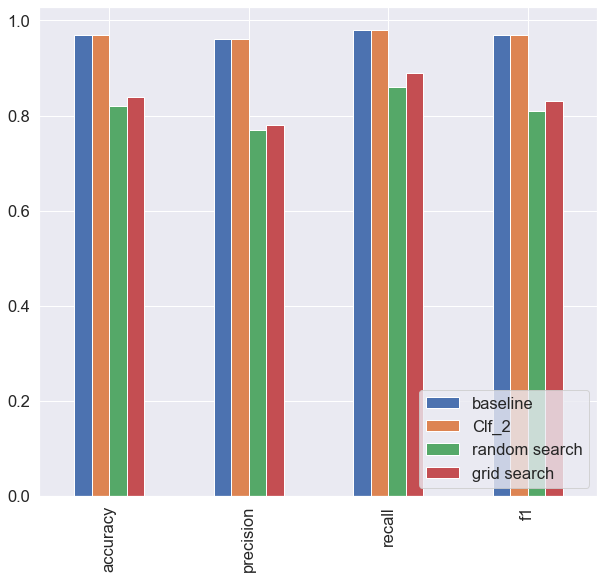

In [226]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "Clf_2": Clf2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})
compare_metrics.plot.bar(figsize = (10,9))
plt.legend(loc="lower right")


## 6. Savigng and Loading a trained model

* Two ways to load and save machine learning models:
1. With python's "pickle"  module
2. with the "joblib" module

1. *** pickle ***

In [229]:
import pickle

#save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl","wb"))

In [230]:
# load a saved file

load_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [232]:
# Make some predictions and evaluate
pickle_y_preds = load_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 83.61%
Prec: 0.78
Recall:0.89
f1:0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

#### *******##*****##***

2. ***joblib***
#### *****************************

In [235]:
from joblib import dump, load

# save the model to directry

dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [236]:
# import a saved model 

load_joblib = load(filename="gs_random_forest_model_1.joblib")

In [237]:
# make some prediction and evaluate

joblib_y_preds = load_joblib.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 83.61%
Prec: 0.78
Recall:0.89
f1:0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}